In [3]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
path = '../../data_mac/data_15_02_2024/'
paramchar_cav1= "nl5_n1_1_E0.20E+00_dtadd4.00_4.00_4_ar0.0_g0.000_gam0.005932_nm600_p0.5E-05_wq4.4619_wc7.415_bc2.400_4.462_7.419_12.600_bw2.000_mr0.00_0.50_0.00_wd7.415_ad0.0000_anh-0.214_dt0.0100_errl0.1E-03_lsfe14_qb2_cv1.0_tmax250"
dyn_cav1 = da.dynamics(nl=5, path=path, paramchar=paramchar_cav1)
dyns={}
paramchar="nl5_n1_1_E0.20E+00_dtadd4.00_4.00_4_ar0.0_g-0.159_gam0.005932_nm600_p0.5E-05_wq4.4619_wc7.415_bc2.400_4.462_7.419_12.600_bw2.000_mr0.00_0.50_0.00_wd7.419_ad0.0060_anh-0.214_dt0.0100_errl0.1E-03_lsfe14_qb2_cv0.0_tmax250"
dyns[1] = da.dynamics(nl=5, path=path, paramchar=paramchar)
paramchar="nl5_n2_2_E0.20E+00_dtadd4.00_4.00_4_ar0.0_g-0.159_gam0.005932_nm600_p0.5E-05_wq4.4619_wc7.415_bc2.400_4.462_7.419_12.600_bw2.000_mr0.00_0.50_0.00_wd7.419_ad0.0060_anh-0.214_dt0.0100_errl0.1E-03_lsfe14_qb2_cv0.0_tmax250"
dyns[2] = da.dynamics(nl=5, path=path, paramchar=paramchar)
paramchar="nl5_n2_2_E0.20E+00_dtadd4.00_4.00_4_ar0.0_g-0.159_gam0.005932_nm600_p0.5E-05_wq4.4619_wc7.415_bc2.400_4.462_7.419_12.600_bw2.000_mr0.00_0.50_0.00_wd7.419_ad0.0060_anh-0.214_dt0.0100_errl0.1E-03_lsfe14_qb2_cv0.0_tmax250"
dyns[8] = da.dynamics(nl=5, path=path, paramchar=paramchar)
paramchar="nl5_n2_16_E0.50E-01_dtadd4.00_4.00_4_ar0.0_g-0.159_gam0.005932_nm600_p0.5E-05_wq4.4619_wc7.415_bc2.400_4.462_7.419_12.600_bw2.000_mr0.00_0.50_0.00_wd7.419_ad0.0060_anh-0.214_dt0.0100_errl0.1E-03_lsfe14_qb2_cv0.0_tmax252"
dyns[16] = da.dynamics(nl=5, path=path, paramchar=paramchar)

path = '../../data_fortran/MPOL_DCT_154/data/'
paramchar="nl5_n2_25_E0.10E-01_dtadd3.00_3.00_4_ar0.0_g-0.159_gam0.005932_nm450_p0.5E-05_wq4.4619_wc7.415_bc2.400_4.462_7.419_12.600_bw1.500_mr0.00_0.33_0.00_wd7.419_ad0.0060_anh-0.214_dt0.0100_errl0.1E-03_lsfe14_qb2_cv0.0_tmax252"
dyns['25A'] = da.dynamics(nl=5, path=path, paramchar=paramchar)

path = '../../data_fortran/MPOL_DCT_155/data/'
paramchar="nl5_n2_25_E0.45E-01_dtadd4.00_4.00_4_ar0.0_g-0.159_gam0.005932_nm450_p0.1E-05_wq4.4619_wc7.415_bc2.400_4.462_7.419_12.600_bw1.500_mr0.00_0.33_0.00_wd7.419_ad0.0060_anh-0.214_dt0.0100_errl0.1E-03_lsfe14_qb2_cv0.0_tmax250"
dyns['25B'] = da.dynamics(nl=5, path=path, paramchar=paramchar)

path_me = '../../data_me/data_27_02_2024/'
paramchar_me= "tmax250_Nq5_Nc20_amp0.0060_kappa0.0014_wq4.4619_anh-0.2141_wc7.4150_g-0.1586_wd7.4190_ms1e-03_dimexp20_qb[1,'B']_11_TRSM2.txt"
times_me = np.loadtxt(path_me+"TIMES_"+paramchar_me)
photons_me = np.loadtxt(path_me+"PHOTONS_"+paramchar_me)
pplt_me = np.loadtxt(path_me+"PPLT_"+paramchar_me)


## Decay rate calibration


-- fitted decay rate/(2*np.pi) = 0.0013865533058359369 GHz


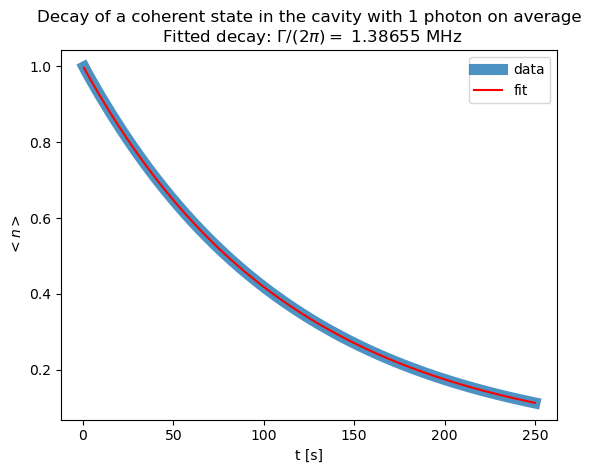

In [4]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cav1.times, dyn_cav1.nk[:,0] )
Gamma=opt[0]

print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cav1.times[1:], dyn_cav1.nk[1:,0], linewidth=8, alpha=0.8,label='data'  )
plt.plot( dyn_cav1.times[1:], exp_decay( dyn_cav1.times[1:], opt[0]), c='red', label='fit'  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()

## CAVITY PHOTON NUMBER and ERROR versus time

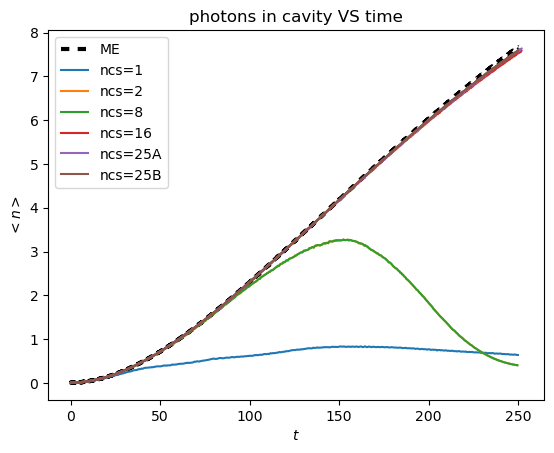

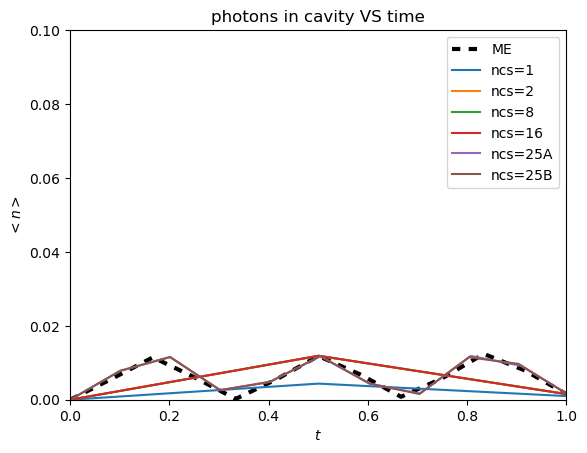

In [5]:
plt.plot( times_me, photons_me, label='ME',c='black', linewidth=3, dashes=[2,2,2,2]  )
for n in dyns:
    plt.plot( dyns[n].times, dyns[n].nk[:,0], label='ncs='+str(n)  )
#plt.ylim(7,8)
#plt.xlim(225,250)
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

plt.plot( times_me, photons_me, label='ME',c='black', linewidth=3, dashes=[2,2,2,2]  )
for n in dyns:
    plt.plot( dyns[n].times, dyns[n].nk[:,0], label='ncs='+str(n)  )
plt.xlim(0,1)
plt.ylim(0,0.1)
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

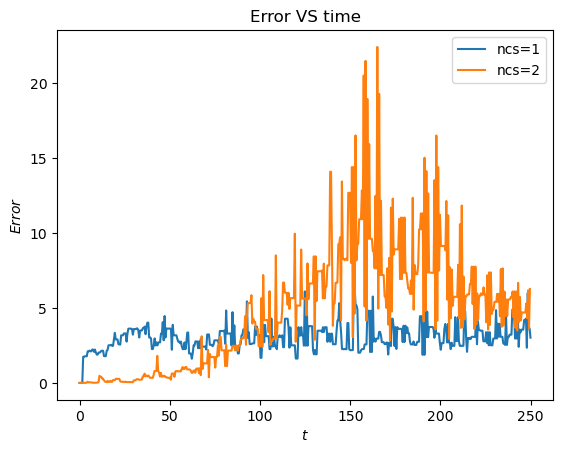

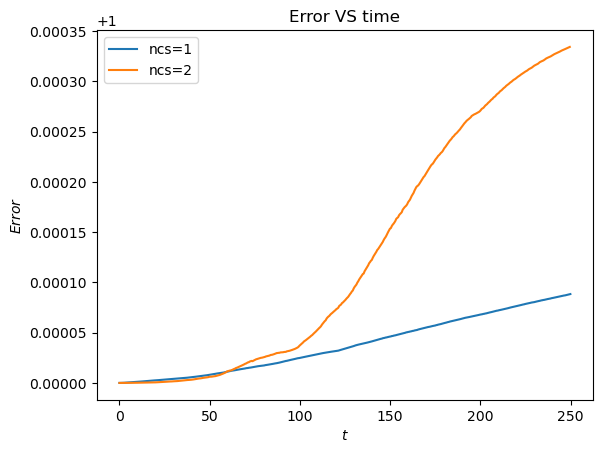

In [7]:
for n in [1,2]:
    plt.plot( dyns[n].times, dyns[n].error, label='ncs='+str(n)  )

plt.ylabel( "$Error$" )
plt.xlabel( "$t$" )
plt.title( "Error VS time"  )
plt.legend()
plt.show()

for n in [1,2]:
    plt.plot( dyns[n].times, dyns[n].norm, label='ncs='+str(n)  )

plt.ylabel( "$Error$" )
plt.xlabel( "$t$" )
plt.title( "Error VS time"  )
plt.legend()
plt.show()

## **Bath photon spectrum**

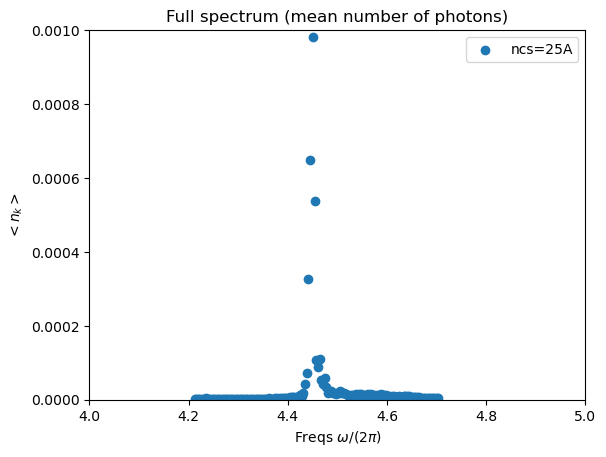

In [17]:
for n in ['25A']:
    plt.scatter( dyns[n].wk/(2*np.pi), dyns[n].nk[-1,1:], label='ncs='+str(n)  )

plt.xlim(4,5)
plt.ylim(0,0.001)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.show()

# **Wigner function of the final state**

In [7]:
dyns[25].final_state.plot_split_wigners(xmin=-5)

KeyError: 25

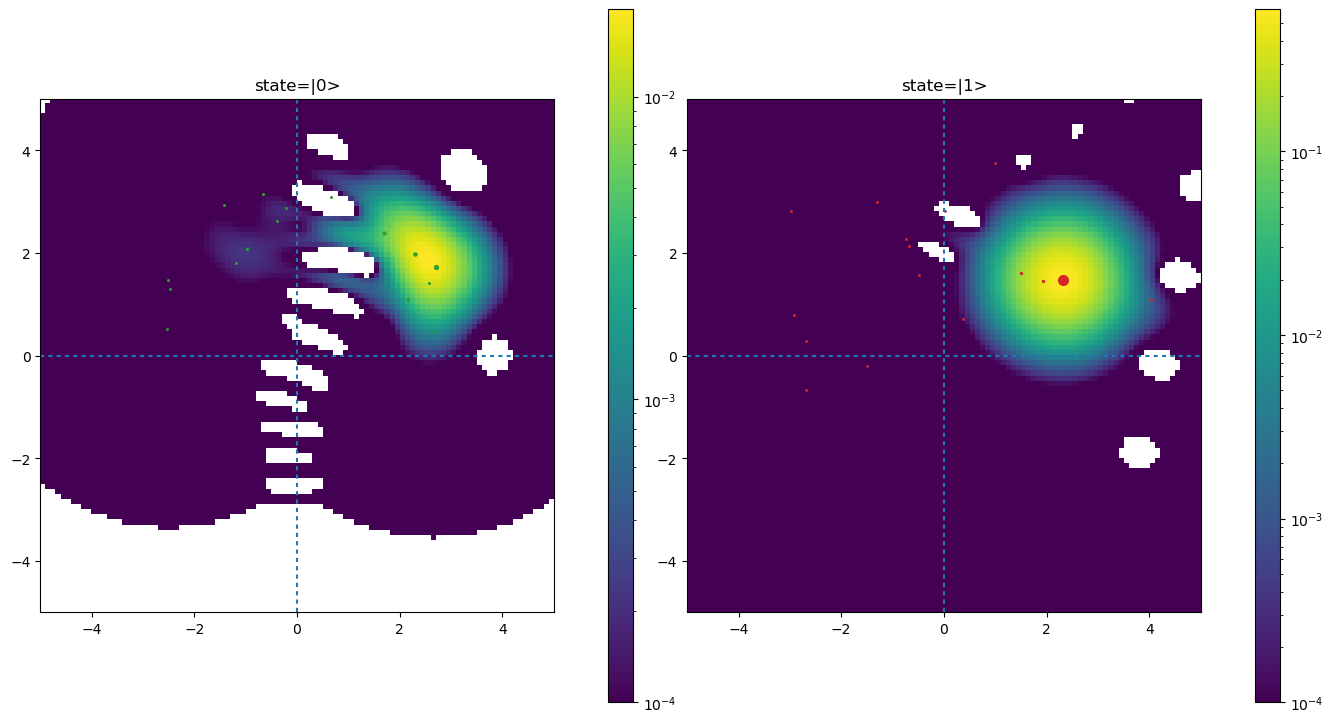

In [15]:
dyns["16_A"].plot_split_wigners(xmin=-5 , log_min=0.0001)

In [8]:
print( dyns['25A'].log )

 ========== LOG FILE ============
 
 -- simulation parameter char:
 nl5_n2_25_E0.10E-01_dtadd3.00_3.00_4_ar0.0_g-0.159_gam0.005932_nm450_p0.5E-05_w
 q4.4619_wc7.415_bc2.400_4.462_7.419_12.600_bw1.500_mr0.00_0.33_0.00_wd7.419_ad0
 .0060_anh-0.214_dt0.0100_errl0.1E-03_lsfe14_qb2_cv0.0_tmax252                  
                                                                
 
 -- parameters initialised
 -- arrays allocated
 -- trajectory allocated
 -- BARE state initialisation complete
  TIME  ||  DEL t   || sol || oth ||  su || ncs || SFE -- SFE                   
                      
 ------ || -------- || --- || --- || --- || --- || ----------                   
                      
    0.0 ||        0 ||   0 ||   0 ||   0 ||   2 ||  30 --   0                   
                      
 -- CS ADDED: fr  2 to   3 at t=   3.02              
 -- CS ADDED: fr  3 to   4 at t=   6.53              
 -- CS ADDED: fr  4 to   5 at t=   9.55              
 -- CS ADDED: fr  5 to   6 at t=  14.

In [9]:
print( dyns['25B'].log )

 ========== LOG FILE ============
 
 -- simulation parameter char:
 nl5_n2_25_E0.45E-01_dtadd4.00_4.00_4_ar0.0_g-0.159_gam0.005932_nm450_p0.1E-05_w
 q4.4619_wc7.415_bc2.400_4.462_7.419_12.600_bw1.500_mr0.00_0.33_0.00_wd7.419_ad0
 .0060_anh-0.214_dt0.0100_errl0.1E-03_lsfe14_qb2_cv0.0_tmax250                  
                                                                
 
 -- parameters initialised
 -- arrays allocated
 -- trajectory allocated
 -- BARE state initialisation complete
  TIME  ||  DEL t   || sol || oth ||  su || ncs || SFE -- SFE                   
                      
 ------ || -------- || --- || --- || --- || --- || ----------                   
                      
    0.0 ||        0 ||   0 ||   0 ||   0 ||   2 ||  30 --   0                   
                      
 -- CS ADDED: fr  2 to   3 at t=   4.02              
 -- CS ADDED: fr  3 to   4 at t=   8.53              
 -- CS ADDED: fr  4 to   5 at t=  13.24              
   25.0 ||      780 ||   1 ||  22 || 